<a href="https://colab.research.google.com/github/naavsaa/Hactiv8-Python/blob/master/Hactiv8/Pertemuan_12_Classifaction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

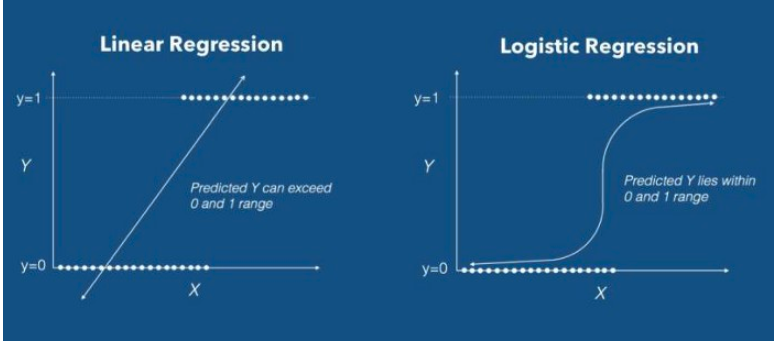

In [ ]:
#pada logistic regression s menandakan function sigmoid yakni g(x) = 1 / (1+e^-x)
#berbeda dengan linear regression yakni function linear g(x) = ax + b
# sigmoid function cocok untuk klasifikasi 0 dan 1 karena sigmoid function ...
# ... meimiliki nilai yang sangat dekat dengan 0 dan 1 (teorema limit)

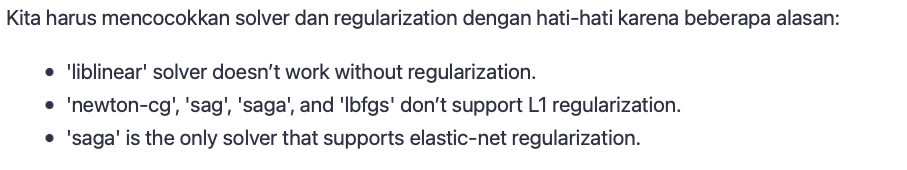

input (weeks_played)     = [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]]

expected output (result) = [0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]



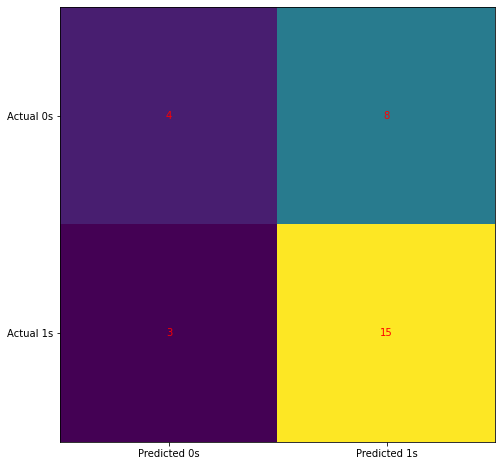

expected output (result) = [0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]

actual output (result')  = [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

our logistic regression score data training (liverpool vs chelsea) : 63.33333333333333%

next week prediction (result')  = [0] -> if  0 liverpool lose, 1 liverpool win 

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.65      0.83      0.73        18

    accuracy                           0.63        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.62      0.63      0.61        30



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# data training : pertandingan olah raga liverpool vs chelsea (30 matches)
# x adalah urutan pertandingan ,
# y adalah hasil pertandingan : 0 = liverpool kalah , 1 = liverpool menang

weeks_played = np.arange(30).reshape(-1,1) #predictor / feature

number_of_player = np.array(
                   [11,11,11,11,10,10,10,10,10,10,
                    10,11,11,11,11,11,11,11,11,11,
                    11,11,11,11,10,10,10,10,10,10,]).reshape(-1,1) #predictor / feature

result = np.array([0,0,0,0,1,1,1,1,1,1,
                    0,0,0,0,1,1,1,1,1,1,
                    0,0,0,0,1,1,1,1,1,1]) #predicted / observasi

print(f"input (weeks_played)     = {weeks_played}\n")
print(f"expected output (result) = {result}\n")

#create model
model = LogisticRegression(solver='liblinear',random_state = 0)
#apply model
model.fit(weeks_played,result)
#test coef model
#print(model.intercept_,model.coef_)
#test the output of model
#model.predict_proba(x)

cm = confusion_matrix(result,model.predict(weeks_played))
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

plt.show()


#see the result

print(f"expected output (result) = {result}\n")

print(f"actual output (result')  = {model.predict(weeks_played)}\n")

print(f"our logistic regression score data training (liverpool vs chelsea) : {model.score(weeks_played,result)*100}%\n")

weeks_played_ahead = np.arange(1).reshape(-1,1) # predictor / feature

print(f"next week prediction (result')  = {model.predict(weeks_played_ahead)} -> if  0 liverpool lose, 1 liverpool win \n")

print(classification_report(result, model.predict(weeks_played)))



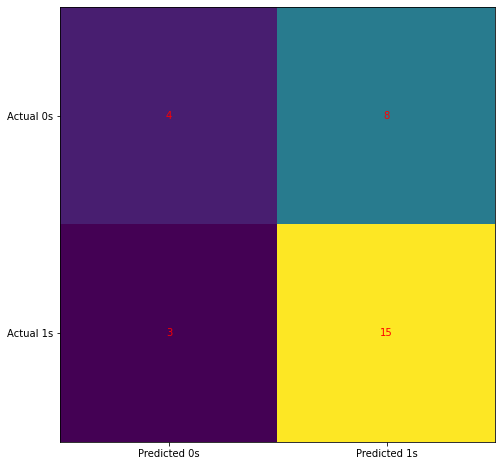

expected output (result) = [0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]

actual output (result')  = [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

our logistic regression score data training (liverpool vs chelsea) : 63.33333333333333%

next week prediction (result')  = [0] -> if  0 liverpool lose, 1 liverpool win 

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.65      0.83      0.73        18

    accuracy                           0.63        30
   macro avg       0.61      0.58      0.58        30
weighted avg       0.62      0.63      0.61        30



In [ ]:
#model improvement

weeks_played = np.arange(30).reshape(-1,1) #predictor / feature

result = np.array([0,0,0,0,1,1,1,1,1,1,
                    0,0,0,0,1,1,1,1,1,1,
                    0,0,0,0,1,1,1,1,1,1]) #predicted / observasi #predicted / observasi

#kita tambahkan regulation strengh yakni C = 1
model = LogisticRegression(solver='liblinear',C=1.0, random_state=10)
model.fit(weeks_played,result)


cm = confusion_matrix(result,model.predict(weeks_played))
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual 0s','Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm[i,j],ha='center',va='center',color='red')

plt.show()

#see the result

print(f"expected output (result) = {result}\n")

print(f"actual output (result')  = {model.predict(weeks_played)}\n")

print(f"our logistic regression score data training (liverpool vs chelsea) : {model.score(weeks_played,result)*100}%\n")

weeks_played_ahead = np.arange(1).reshape(-1,1) # predictor / feature

print(f"next week prediction (result')  = {model.predict(weeks_played_ahead)} -> if  0 liverpool lose, 1 liverpool win \n")

print(classification_report(result, model.predict(weeks_played)))

